<a href="https://colab.research.google.com/github/rkrissada/100DayOfMLCode/blob/master/day_063_solving_simple_prediction_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving Simple Prediction Problem

About one in seven U.S. adults has diabetes now, according to the Centers for Disease Control and Prevention. But by 2050, that rate could skyrocket to as many as one in three. 

We are going to do: Learning how to use Machine Learning to help us predict Diabetes.

## Data

The diabetes data set was originated from UCI Machine Learning Repository

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

diabetes = pd.read_csv('diabetes.csv')

In [2]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


The dianetes data set consists of 768 data points, with 9 features each:

**"Outcome"** is the feature we are going to predict, 0 mean no diabetes, 1 means diabetes.

In [5]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Of these 768 data points, 500 are labled as 0 and 268 as 1:

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


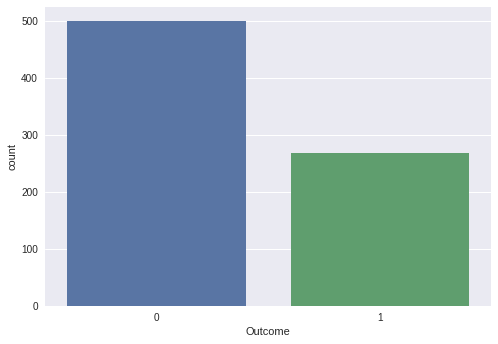

In [6]:
import seaborn as sns

sns.countplot(diabetes['Outcome'],label="count")

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Model

### k-Nearest Neighbors

The K-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training data set. To make a prediction for a new data point, the algorithm finds the closest data points in the training data set - its "nearest neighbors"


First, Let's investigate whether we can confrim the connection between nodel complexity and accuracy:

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)

This ***stratify*** parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable *y* is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, *stratify=y* will make sure that your random split has 25% of 0's and 75% of 1's.

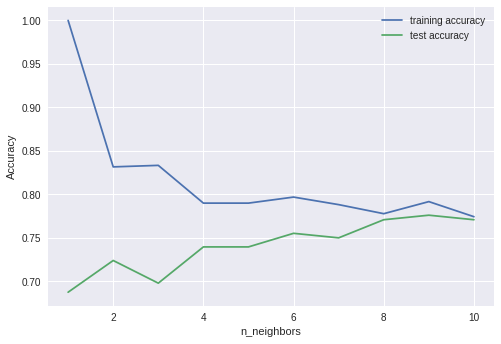

In [9]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # build the model
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(X_train, y_train)
  # record trainning set accuracy
  training_accuracy.append(knn.score(X_train, y_train))
  # record test set accuracy
  test_accuracy.append(knn.score(X_test, y_test))
  
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
#plt.savefig('knn_compare_model')
plt.show()

The above plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. Considering if we chosse one single nearest neighbor, the prediction on the trainning set is perfect. But when more neighbors are considered, the training accuracy drops, indication that using the single nearest neighbor leads to a model that is too complex. The best performance is somewhere around 9 neighbors.

The plot suggests that we should choose n_neighbors=9.

In [10]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.78


### Logistic regression

Logistic Regrssion is one of the most common classification algorithms.

In [11]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.781
Test set score: 0.771


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The default value of C=1 provides with 78% accuracy on the training and 77% accuracy on the test set.

In [12]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.700
Test set accuracy: 0.703


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Using C=0.01 results in lower accuracy on both the training and test sets.

In [13]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set accuracy: 0.785
Test set accuracy: 0.766


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Using C=100 results in a litle bit higher accuracy on the training set and little bit lower accuracy on the test set, confirming that less regularization and a more complex model may not generalize better than default setting.

Therefore, we should choose default value C=1

Let's visualize the coefficients learned by the models with the three different settings of the regularization parameter C.

Stronger regularization (C=0.001) pushes coefficients more and more toward zero. Inspecting the plot more closely, we can also see that feature "DiabetesPedigreeFunction", for C=100, C=1 and C=0.001, the coefficients is positive. This indicates that high "DiabetesPedigreeFunction" feature is related to a sample begin "diabetes", regardless which model we look at.

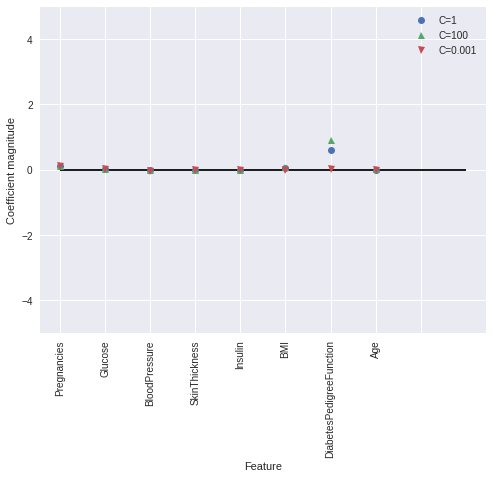

In [14]:
diabetes_features = [x for i, x in enumerate(diabetes.columns) if i!=8]

plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, diabetes.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')
plt.show()

### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set:{:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.714


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to lower accuracy on the training set, but an improvement on the test set.

In [17]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set:{:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set:0.773
Accuracy on test set:0.740


#### Feture Importance in Decsion Trees

Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means "not used at all" and 1 mean "perfectly predicts the target". The feature importances always sum to 1:

In [20]:
 print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


Then we can visualize the feature importances:

In [0]:
def plot_feature_importances_diabetes(model):
  plt.figure(figsize=(8,6))
  n_features = 8
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), diabetes_features)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.ylim(-1, n_features)

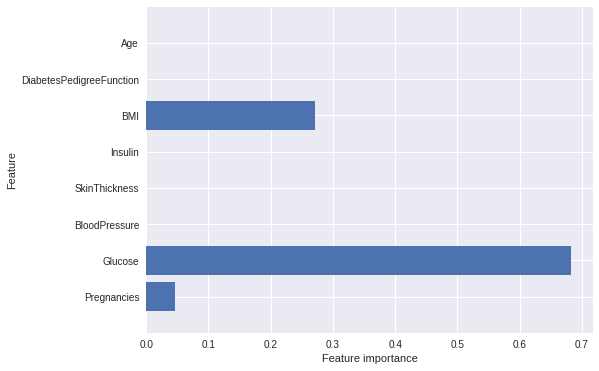

In [25]:
plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')
plt.show()

Feature "Glucose" is by far the most important feature

### Random Forest

Let's apply a random forest consisting of 100 trees on the diabetes data set

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set:{:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test,y_test)))

Accuracy on training set:1.000
Accuracy on test set: 0.786


The random forest gives us an accuracy of 78.6%, better than the logistic regression model or a single decision tree, without tuning any parameters. However, we can adjust the max_features setting, to see whether the result can be improved.

In [27]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set:{:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set:0.800
Accuracy on test set:0.755


It did not, this indicates that the default parameters of the random forest work well.


#### Feature importance in Random Forest

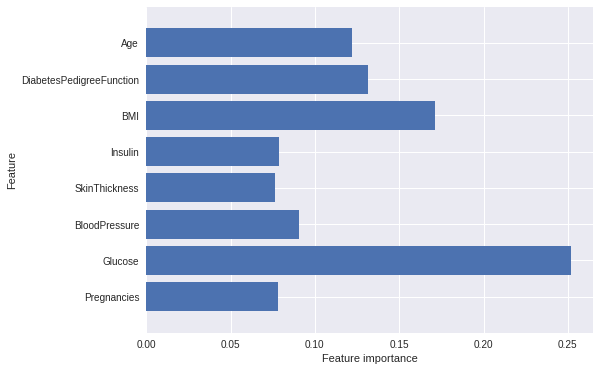

In [28]:
plot_feature_importances_diabetes(rf)

Similarly to the single decision tree, the random forest also gives a lot of importance to the "Clucose" feature, but it also chooses "BMI" to be the 2nd most informative feature overall. The randomness in building the random forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree.

### Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
print("Accuracy on training set:{:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test,y_test)))

Accuracy on training set:0.917
Accuracy on test set: 0.792


We are likely to be overfitting. To reduce overfitting, we cloud either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:

In [31]:
gb1 = GradientBoostingClassifier(random_state=0,max_depth=1)
gb1.fit(X_train, y_train)
print("Accuracy on training set:{:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(gb1.score(X_test, y_test)))

Accuracy on training set:0.804
Accuracy on test set:0.781


In [32]:
gb2 = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gb2.fit(X_train, y_train)
print("Accuracy on training set:{:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(gb2.score(X_test, y_test)))

Accuracy on training set:0.802
Accuracy on test set:0.776


Both methods of decreasing the model complexity reduced the training set accuracy, as expected. However, in this case, none of these methods increased the generalization performance of the test set.
We can visualize the feature importances to get more insight into our model even though we are not really happy with the model:

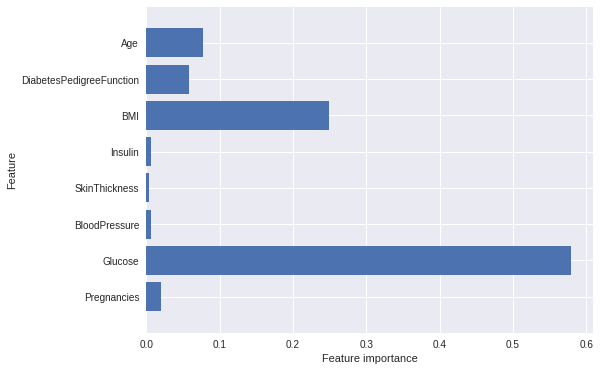

In [35]:
 plot_feature_importances_diabetes(gb1)

We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importances of the random forests, it gives weight to all of the features in this case.

### Support Vector Machine

In [36]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set:{:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set:{:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set:1.00
Accuracy on test set:0.65


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The model overfits quite substantially, with a perfect score on the training set and only 65% accuracy on the test set.

SVM requires all the features to very on similar scale. We will need to re-scale our data that all the features are approximately on the same scale:

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set:{:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set:{:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set:0.769
Accuracy on test set:0.771


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Scaling the data made a huge difference. Now we are actually underfitting, where training and test set performance are quite similar but less close too 100% accuracy. From here, we can try increasing either C or gamma to fit a more complex model.

In [44]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set:{:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.790
Accuracy on test set:0.797


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Here, increasing C allows us to improve the model, resulting in 79.7% test set accuracy

### Deep Learning

In [45]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set:{:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set:0.731
Accuracy on test set:0.724


The accuracy of the Multilayer perceptrons (MLP) is not as good as the other models at all, this is likely due to scaling of the data. deep learning algorithms also expect all input features to very in a similar way, and ideally to have a mean of 0, and a variance of 1. We must re-scale our data so that it fulfills these requirements.

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set:{:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Accuracy on training set:0.823
Accuracy on test set:0.802


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Let's increse the number of iterations

In [47]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.908
Accuracy on test set:0.792


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Increasing the number of iterations only increased the training set performace, not the test set performance.

Let's increase the alpha parameter and add stronger regularization of the weights:

In [48]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.806
Accuracy on test set:0.797


The result is good, but we are not able to increase the test accuracy further.

Therefore, our best model so far is default deep learning model after scaling.

Finally, we plot a heat map of the first layer weights in a neural network learned on the diabetes data set.

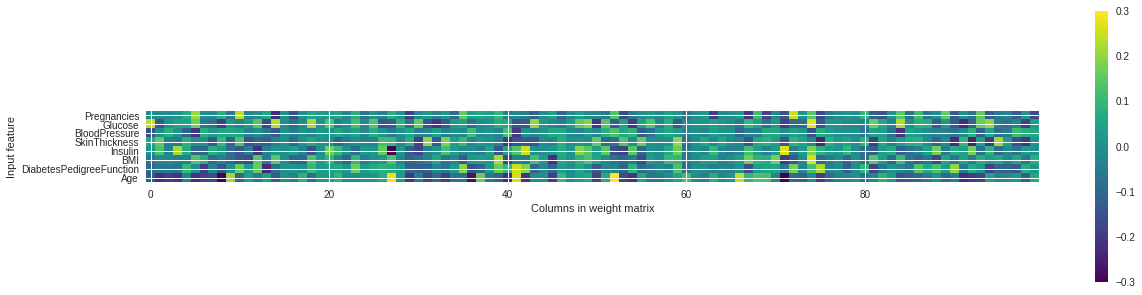

In [53]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none',cmap='viridis')
plt.yticks(range(8), diabetes_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

From the heat map, it is not easy to point out quickly that which feature (features) have relatively low weights compared to the other features.